## Question 5
You are a life actuary of an insurance company. Today on 13 March 2022, a potential
client, Alice, is looking to sign a permanent life insurance contract with your company.
Alice, born on 28 October 1983, is a smoker with the health condition standard for her
cohort with the same age, gender, and smoker status. You decide to apply the 2015
Valuation Basic Table (VBT) (www.soa.org/files/research/exp-study/2015-vbt-smokerdistinct-alb-anb.xlsx) for Alice’s mortality evaluation with the Age Nearest Birthday
(ANB) method for her age calculation. Your company applies the valuation interest rate
of 3.5% for premium pricing:

a) Calculate Alice’s annal unconditional survival rates $_np_x$ from now to age 42. [3
marks]

b) Calculate Alice’s life expectancy in years (show one decimal place). [2 marks]

c) Calculate the probability that Alice dies exactly between 6 and 9 years from now
(show five decimal places). [2 marks]

d) Calculate the minimum annual premium rate (premium as a fraction of death
benefit) that your company should charge for Alice’s cohort (show five decimal
places). [3 marks]

e) What technologies can you apply to enable a closer prediction on the company’s
cash flow linked to this line of business of permanent life insurance? [answers
should be no longer than 200 words] [4 marks]

https://en.wikipedia.org/wiki/Force_of_mortality

In [92]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy.stats import norm
import matplotlib.pyplot as plt

In [62]:
excel_df = pd.read_excel('./data/2015-vbt-smoker-distinct-alb-anb.xlsx', header=2, sheet_name='2015 FSM ANB')
excel_df.set_index = excel_df['Iss. Age']
excel_df.head()

,Iss. Age,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,Ult.,Att. Age
0,18,0.27,0.27,0.27,0.27,0.27,0.29,0.33,0.34,0.34,...,0.73,0.86,1.03,1.17,1.29,1.40,1.49,1.58,1.67,43
1,19,0.27,0.27,0.26,0.26,0.27,0.31,0.33,0.33,0.33,...,0.86,1.01,1.16,1.29,1.40,1.49,1.58,1.67,1.76,44
2,20,0.24,0.23,0.24,0.25,0.29,0.31,0.32,0.32,0.34,...,1.00,1.14,1.27,1.40,1.49,1.58,1.67,1.76,1.87,45
3,21,0.19,0.21,0.23,0.26,0.29,0.30,0.31,0.33,0.37,...,1.13,1.26,1.38,1.49,1.58,1.67,1.76,1.87,2.05,46
4,22,0.17,0.20,0.24,0.27,0.28,0.30,0.32,0.35,0.39,...,1.24,1.36,1.48,1.58,1.67,1.76,1.87,2.05,2.25,47


In [63]:
alice_bday=date(1983, 10, 28)
today = date(2022, 3, 12)
alice_age = (today- alice_bday)/timedelta(days=365)
alice_age_anb = round(alice_age)
print(f"Alice is {alice_age_anb} years old (ANB)")

Alice is 38 years old (ANB)


${_n|}q_x$: conditional mortality rate, i.e. the person is dead at the end of $(n+1)^{\text{th}}$ year given the person is alive at the end of the $n^{\text{th}}$ year

$1 - {_n|}q_x$: conditional survival rate

${_n}p_x$ the probability that a person aged $x$ is alive at the end of the $n^{\text{th}}$ year
\begin{equation}
{_n}p_x = \prod^{n-1}_{m=0}1-{_m|}q_x \quad n \geq 1
\end{equation}

$P_n$ = the probability that the person dies between year $n$ and $n+1$

In [210]:
series = excel_df.loc[excel_df['Iss. Age'] == alice_age_anb].drop(columns=['Iss. Age', 'Ult.', 'Att. Age'])
n = len(series.columns)
cols = series.columns
cols.insert(0, 0)
df = pd.DataFrame(columns=cols)
df.loc['${_n|}q_x$'] = series.to_numpy()[0] * 10**-3
df.loc['$1-{_n|}q_x$'] = 1 - df.loc['${_n|}q_x$'] 
df.loc['${_n}p_x$'] = df.loc['$1-{_n|}q_x$']
df[0] = [0, 1, 1]
for i in range(1,n+1):
    df.loc['${_n}p_x$', i] = np.multiply(df.loc['$1-{_n|}q_x$', i], df.loc['${_n}p_x$', i-1])
df.loc['$P_n$'] = df.loc['${_n|}q_x$'] 
for i in range(1, n+1):
    df.loc['$P_n$', i] = df.loc['${_n|}q_x$', i] * df.loc['${_n}p_x$', i-1]
df = df.reindex(sorted(df.columns), axis=1)
df.loc['Age'] = np.arange(alice_age_anb-1, n+alice_age_anb)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
${_n|}q_x$,0.0,0.00037,0.00053,0.000720,0.000880,0.001010,0.001130,0.001260,0.001400,0.001780,...,0.003910,0.004360,0.004830,0.005350,0.005930,0.006590,0.007310,0.008120,0.009010,0.010010
$1-{_n|}q_x$,1.0,0.99963,0.99947,0.999280,0.999120,0.998990,0.998870,0.998740,0.998600,0.998220,...,0.996090,0.995640,0.995170,0.994650,0.994070,0.993410,0.992690,0.991880,0.990990,0.989990
${_n}p_x$,1.0,0.99963,0.99910,0.998381,0.997502,0.996495,0.995369,0.994115,0.992723,0.990956,...,0.971012,0.966779,0.962109,0.956962,0.951287,0.945018,0.938110,0.930492,0.922109,0.912878
$P_n$,0.0,0.00037,0.00053,0.000719,0.000879,0.001007,0.001126,0.001254,0.001392,0.001767,...,0.003812,0.004234,0.004670,0.005147,0.005675,0.006269,0.006908,0.007617,0.008384,0.009230
Age,37.0,38.00000,39.00000,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.000000,...,53.000000,54.000000,55.000000,56.000000,57.000000,58.000000,59.000000,60.000000,61.000000,62.000000


In [195]:
ult_df = pd.DataFrame(columns=np.arange(1, len(ult_vector)))
ult_df.loc['${_n|}q_x$'] = ult_vector * 10**-3
ult_df.loc['$1-{_n|}q_x$'] =  1 - ult_df.loc['${_n|}q_x$'] 
ult_df.loc['${_n}p_x$'] = np.arange(1, len(ult_vector))
ult_df.loc['$P_n$'] = np.arange(1, len(ult_vector))
ult_df[0] = df[25]
ult_df = ult_df.reindex(sorted(ult_df.columns), axis=1)
n = len(ult_df.columns)
for i in range(1,n):
    ult_df.loc['${_n}p_x$', i] = np.multiply(ult_df.loc['$1-{_n|}q_x$', i], 
                                             ult_df.loc['${_n}p_x$', i-1])
ult_df.loc['$P_n$'] = ult_df.loc['${_n|}q_x$'] 
for i in range(1, n):
    ult_df.loc['$P_n$', i] = ult_df.loc['${_n|}q_x$', i] * ult_df.loc['${_n}p_x$', i-1]
ult_df

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
${_n|}q_x$,0.010010,0.001760,0.001870,0.002050,0.002250,0.002460,0.002710,0.002970,0.003280,0.003610,...,0.495830,0.500000,0.500000,0.500000,0.500000,0.500000,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
$1-{_n|}q_x$,0.989990,0.998240,0.998130,0.997950,0.997750,0.997540,0.997290,0.997030,0.996720,0.996390,...,0.504170,0.500000,0.500000,0.500000,0.500000,0.500000,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
${_n}p_x$,0.912878,0.911272,0.909568,0.907703,0.905661,0.903433,0.900985,0.898309,0.895362,0.892130,...,0.000037,0.000019,0.000009,0.000005,0.000002,0.000001,5.839518e-07,2.919759e-07,1.459880e-07,7.299398e-08
$P_n$,0.010010,0.001607,0.001704,0.001865,0.002042,0.002228,0.002448,0.002676,0.002946,0.003232,...,0.000037,0.000019,0.000009,0.000005,0.000002,0.000001,5.839518e-07,2.919759e-07,1.459880e-07,7.299398e-08


<hr>

## a) Calculate Alice’s annal unconditional survival rates $_np_x$ from now to age 42. [3 marks]

In [67]:
year_range = np.arange(alice_age_anb, 44)
df1 = df.loc['${_n}p_x$', np.arange(1,len(year_range))].copy()
df1.rename(index=lambda x: year_range[x-1], inplace=True)
df1

38    0.999630
39    0.999100
40    0.998381
41    0.997502
42    0.996495
Name: ${_n}p_x$, dtype: float64

<hr>

## b) Calculate Alice’s life expectancy in years (show one decimal place)

\begin{equation}
LE = \sum_n {_n}p_x - 0.5
\end{equation}

In [197]:
x = df.loc['${_n}p_x$', 1:].to_numpy()
y = ult_df.loc['${_n}p_x$', 1:].to_numpy()
z = np.concatenate((x, y))

Alice's life expectancy is 57.1 years


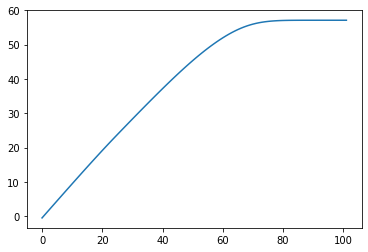

In [191]:
LE = round(np.sum(z)-0.5,1)
array = []
for idx, i in enumerate(z):
    array.append(np.sum(z[:idx])-0.5)
plt.plot(array)
print(f"Alice's life expectancy is {LE} years")

<hr>

## c) Calculate the probability that Alice dies exactly between 6 and 9 years from now (show five decimal places)

Want to find $P_7$ + $P_8$ + $P_9$

In [203]:
prob = np.sum(df.loc['$P_n$', np.arange(7,10)])
print(f"Probability that Alice dies exactly between 6 and 9 years from now is {round(prob, 5)}")

Probability that Alice dies exactly between 6 and 9 years from now is 0.00441


<hr>

## d) Calculate the minimum annual premium rate (premium as a fraction of death benefit) that your company should charge for Alice’s cohort (show five decimal places).

\begin{equation}
PV = \sum^{\infty}_{n=0} \frac{_np_x\cdot\pi_n - P_n\cdot DB}{(1+r)^n}
\end{equation}
where: 
- $\pi_n$: premium to be paid at time n (up-front payment, from time 0)
- $DB$: death benefit amount
- $r$: valuation interest rate = 3.5%

In [12]:
# parameters:
# risk-free interest rate:
r = 0.015;
# deferment rate
q = 0.01;
# volatility
sigma = 0.13
# loan rate
l = 0.06;
# current house price
S = 400000;
# current loan value
K = 120000;

In [38]:
df.loc['multiplier1', 0]  = K
for t in range(1, n+1):
    df.loc['multiplier1', t] = K * np.exp((l-r)*t);

df.loc['d1', 0] = 0;
for t in range(1,n+1):
    df.loc['d1', t] = (np.log(S * np.exp(-q*t)/df.loc['multiplier1', t]) + t * sigma * sigma * 0.5)/ (sigma * np.sqrt(t))
    
for t in range(0,n+1):
    df.loc['d2', t] = df.loc['d1', t] - sigma * np.sqrt(t);

df.loc['N-d1'] = norm.cdf(-df.loc['d1'])
df.loc['N-d2'] = norm.cdf(-df.loc['d2'])

for t in range(1,n+1):
    df.loc['NNEG', t] = df.loc['$P_n$', t] * (df.loc['multiplier1', t] * df.loc['N-d2', t] - S * np.exp(-q * t) * df.loc['N-d1', t]);
    
for t in range(1,n+1):
    df.loc['$PV$', t] = df.loc['$P_n$', t] * df.loc['multiplier1', t];
    
print(f'Present value of the loan is £{round(df.loc["$PV$"].sum(), 5)}')

Present value of the loan is £161285.7075


<hr>

# e) What technologies can you apply to enable a closer prediction on the company’s cash flow linked to this line of business of permanent life insurance? (200 words)  

Wearable technology such as smart watches can give accurate estimates on consumer's lifestyle as they are able track body metrics such as heart rate, sleep and active minutes. This can lead to company's better prediction on life expectancies, therefore able to adjust their premiums accordingly making it a closer prediction on their cash flow. 

ML can be used to better discard cases of fraud through data analytics and will help automate company's log files

AI can derive insight at greater speed and with greater accuracy but also to derive new insight too compared to humans. Leading to more accurate forecasting at a higher turnaround